In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
plt.style.use(["science","grid"])

In [2]:
data1 = pd.read_feather("rerouting15_beta0")
data2 = pd.read_feather("rerouting30_beta1")
data3 = pd.read_feather("rerouting30_beta0")

input_vars1 = pd.read_csv("input_parameters15_beta0.csv")
input_vars2 = pd.read_csv("input_parameters30_beta1.csv")
input_vars3 = pd.read_csv("input_parameters30_beta0.csv")

data2.o0 = data2.o0+(len(input_vars1))
data3.o0 = data3.o0+(len(input_vars1)+len(input_vars2))

data = pd.concat([data1,data2,data3]).reset_index()
input_vars = pd.concat([input_vars1,input_vars2,input_vars3]).reset_index()

In [3]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

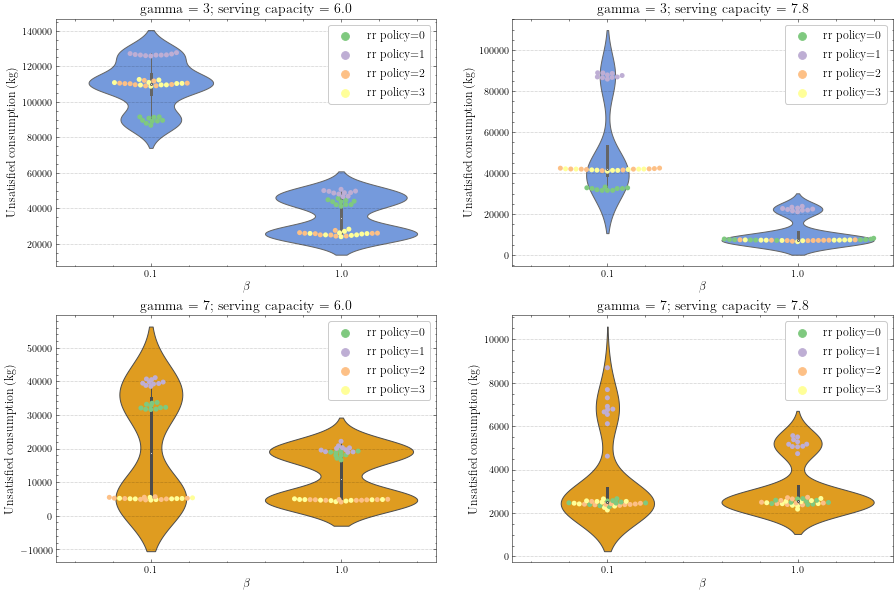

In [12]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()

for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]        

    
gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):    
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]
    for g in range(len(gammas)):
        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
       
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]),fontsize=14)
                
        ax[g,s].set_ylabel("Unsatisfied consumption (kg)",fontsize=12)
        ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='upper right',fontsize=12)

REPORT PLOT: Cumulative unsatisfied consumption TWO selected


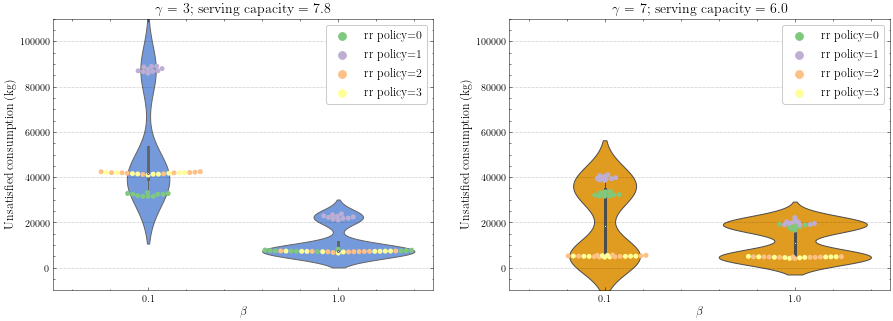

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-10e3,110e3])
    ax[i].set_ylabel("Unsatisfied consumption (kg)",fontsize=12);
    
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_xlabel(r"$\beta$",fontsize=12)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='upper right',fontsize=12)    
print("REPORT PLOT: Cumulative unsatisfied consumption TWO selected")

In [ ]:
## Food waste

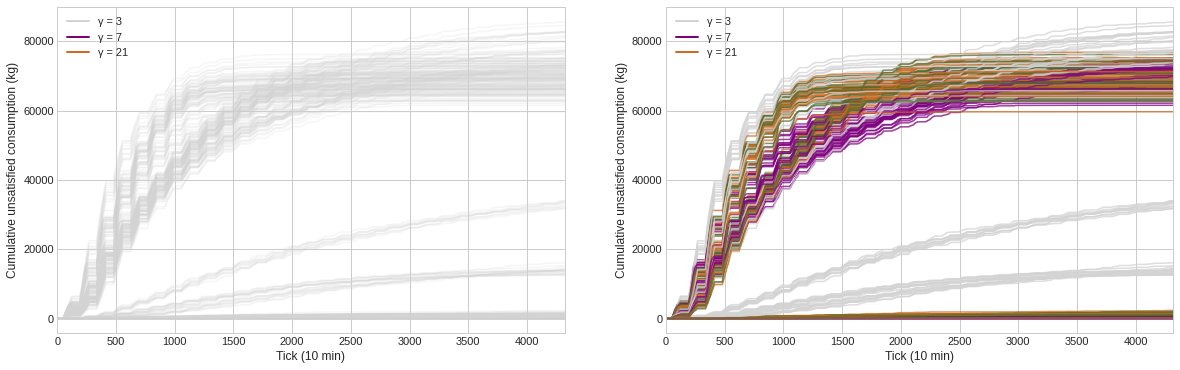

In [56]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['lightgrey','purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['γ = 3', 'γ = 7', 'γ = 21']

# Zoom for 2nd graph
# ax[1].set_ylim([-100,30000])
# ax[0].set_ylim([-100,100000])

# graph layout
# plt.title("")

for i in d:    
    for j in d[i]:
        if input_vars.ration_size_policy[j] == 30:
            ax[0].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, data.o2[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])], alpha=.75)
            
        else:
            ax[0].plot( x, data.o2[data.o0==j],color=colors[int(input_vars.rerouting_policy[j])], alpha=.75)
            ax[1].plot( x, data.o2[data.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

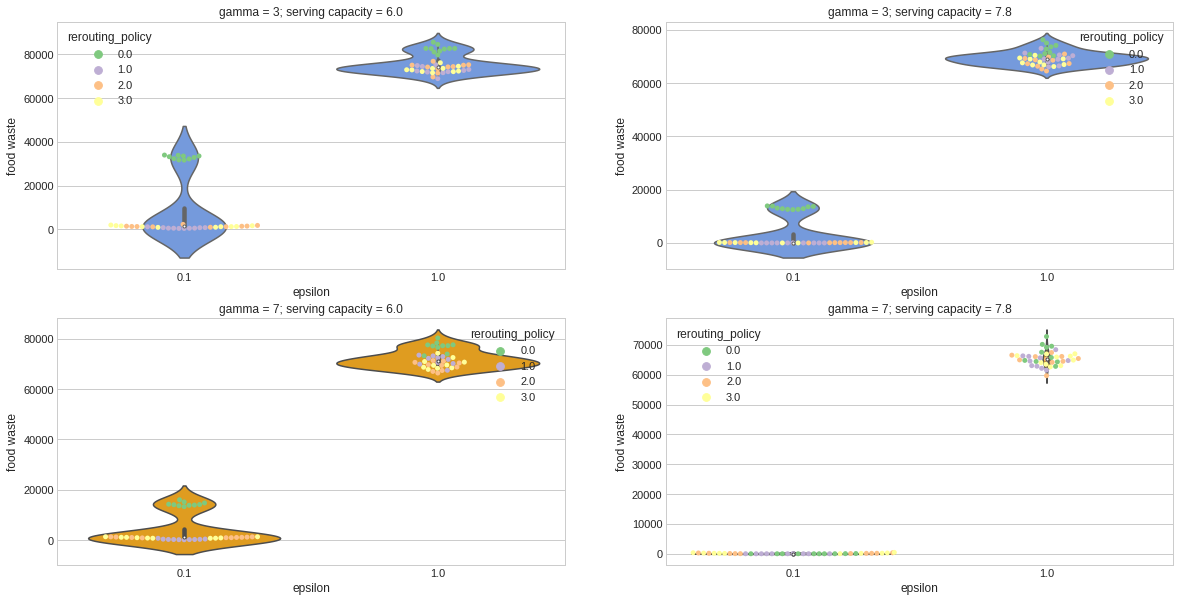

In [68]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
plt.style.use("seaborn-whitegrid")
uc_endvals_dict = {}
uc_endvals_dict["food waste"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars.index:
    uc_endvals_dict["food waste"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="food waste", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="food waste", data=tmp2,color=my_palette['light'][g])
        
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]))

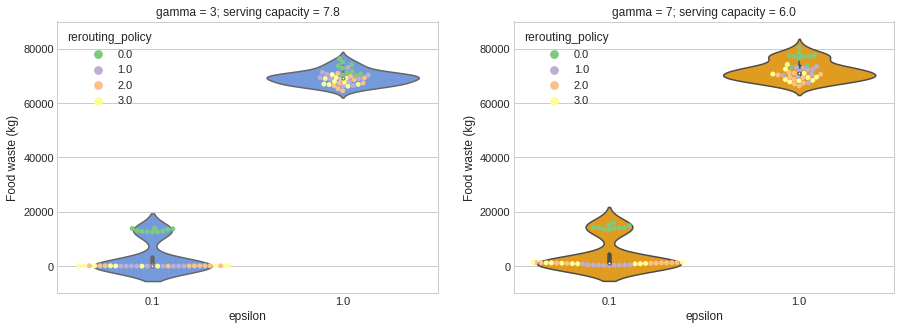

In [70]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="food waste", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="food waste", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_title("gamma = %s; serving capacity = %s"%(gs[i][0],gs[i][1]))
    ax[i].set_ylim([-10e3,90e3])
    ax[i].set_ylabel("Food waste (kg)");

## Queuing

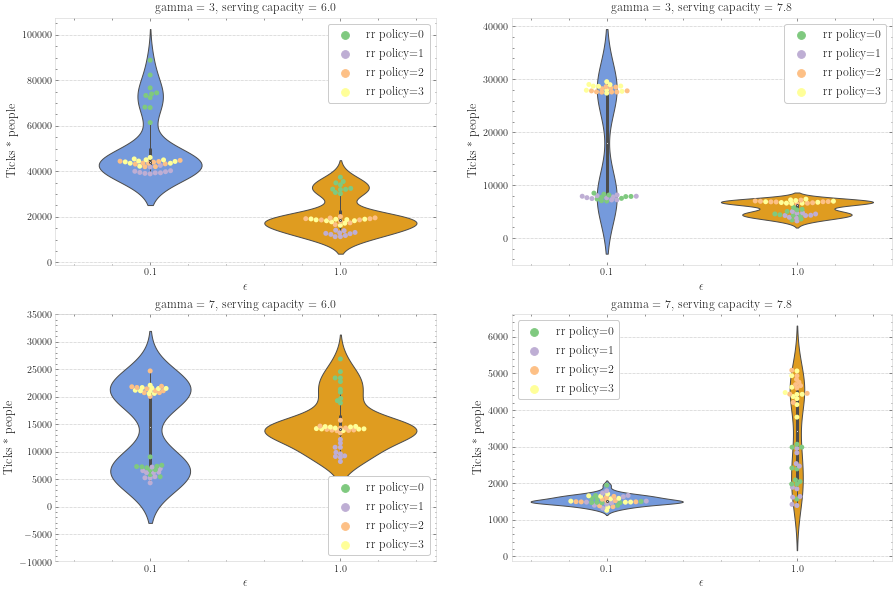

In [54]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()

for j in input_vars.index:
    uc_endvals_dict["ticks*people"].append( np.sum(data[data.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]  

gammas = [3,7]
scs = [6.0,7.8]
positions = [list(),list()]
positions[0].append('upper right')
positions[0].append('upper right')
positions[1].append('lower right')
positions[1].append('upper left')
for s in range(len(scs)):
    
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]),fontsize=12)
        
        ax[g,s].set_ylabel("Ticks * people",fontsize=12);
        ax[g,s].set_xlabel(r"$\epsilon$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[g][s],fontsize=12)    
ax[1,0].set_ylim([-10e3,35e3]);

REPORT PLOT: Cumulative queuing time for busiest facility #5, TWO selected


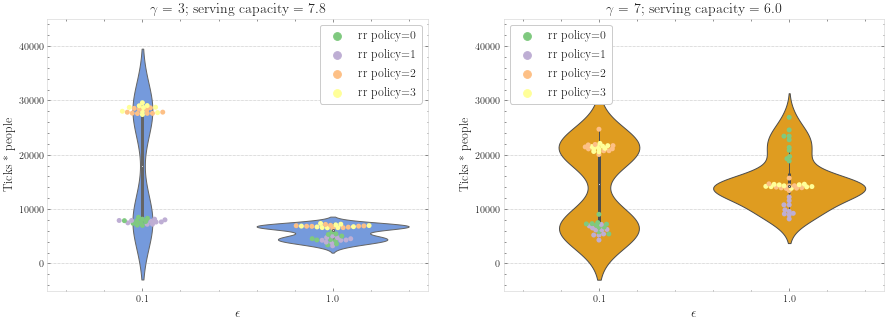

In [48]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
positions=['upper right','upper left']
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="ticks*people", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-5e3,45e3])
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\epsilon$",fontsize=14,fontweight='bold')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[i],fontsize=12)    
print("REPORT PLOT: Cumulative queuing time for busiest facility #5, TWO selected")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


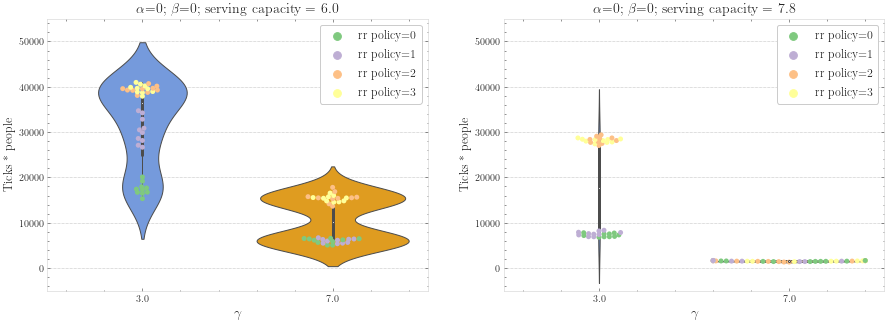

In [79]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()
for j in input_vars.index:
    uc_endvals_dict["ticks*people"].append( np.sum(data[data.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)

input_vars_filtered = pd.concat([input_vars.reset_index(),pd.DataFrame(uc_endvals_dict)],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==0.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.alpha==0.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]  

scs = [6.0,7.8]
for i in range(len(scs)):
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[i]]

    sns.swarmplot(ax=ax[i] ,x="gamma", y="ticks*people", data=tmp,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="gamma", y="ticks*people", data=tmp,palette=my_palette['light'])
    ax[i].set_ylim([-0.5e4,5.5e4])
    ax[i].set_title(r"$\alpha$=0; $\beta$=0; serving capacity = %s"%(scs[i]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\gamma$",fontsize=14,fontweight='bold')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='upper right',fontsize=12)    

## Queuing 2

In [50]:
q_sum = list()
n_facs = 12
for j in input_vars.index:
#     uc_endvals_dict["u_con (norm)"].append(data_batch2.o2[data_batch2.o0==j].iloc[-1])
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data[data.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum)    

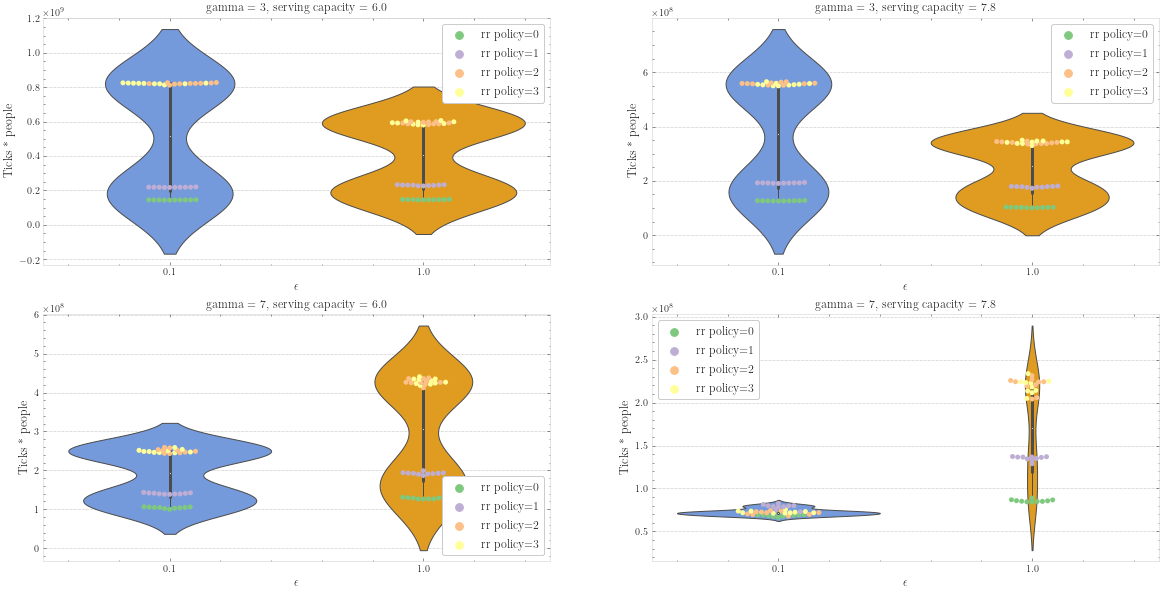

In [55]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()
for j in range(len(input_vars)):
    uc_endvals_dict["ticks*people"].append( q_sum[j] )

input_vars_filtered = pd.concat([input_vars.reset_index(),pd.DataFrame(uc_endvals_dict)],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]  

gammas = [3,7]
scs = [6.0,7.8]
positions = [list(),list()]
positions[0].append('upper right')
positions[0].append('upper right')
positions[1].append('lower right')
positions[1].append('upper left')
for s in range(len(scs)):
    
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]),fontsize=12)
        
        ax[g,s].set_ylabel("Ticks * people",fontsize=12);
        ax[g,s].set_xlabel(r"$\epsilon$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[g][s],fontsize=12)    


REPORT PLOT: Cumulative queuing of all facilities summed, TWO selected


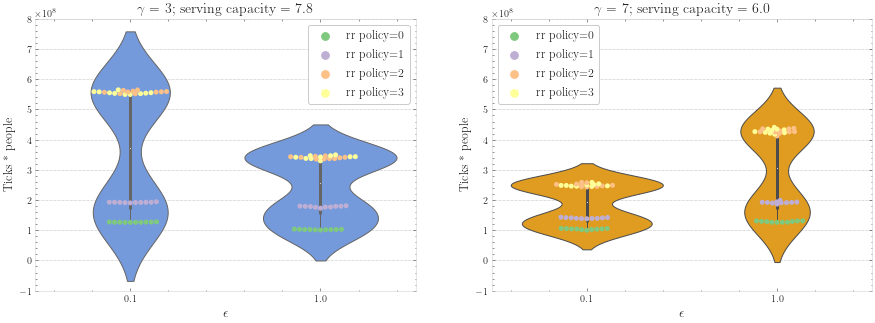

In [59]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

positions=['upper right','upper left']
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="ticks*people", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-1e8,8e8])
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\epsilon$",fontsize=14,fontweight='bold')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[i],fontsize=12)    
print("REPORT PLOT: Cumulative queuing of all facilities summed, TWO selected")

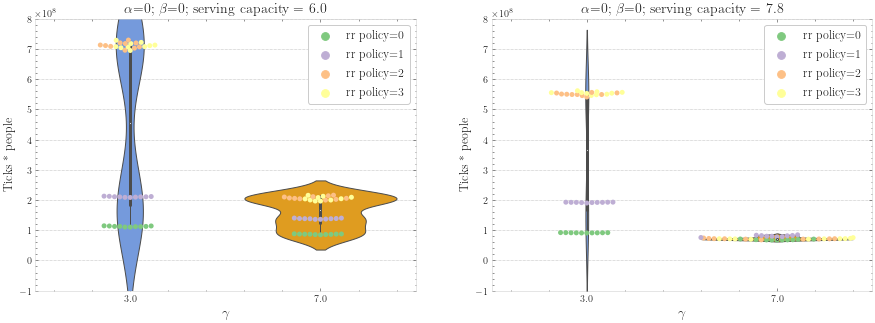

In [75]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()
for j in range(len(input_vars)):
    uc_endvals_dict["ticks*people"].append( q_sum[j] )

input_vars_filtered = pd.concat([input_vars.reset_index(),pd.DataFrame(uc_endvals_dict)],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==0.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.alpha==0.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]  

scs = [6.0,7.8]
for i in range(len(scs)):
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[i]]

    sns.swarmplot(ax=ax[i] ,x="gamma", y="ticks*people", data=tmp,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="gamma", y="ticks*people", data=tmp,palette=my_palette['light'])
    ax[i].set_ylim([-1e8,8e8])
    ax[i].set_title(r"$\alpha$=0; $\beta$=0; serving capacity = %s"%(scs[i]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\gamma$",fontsize=14,fontweight='bold')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='upper right',fontsize=12)    